In [1]:
from numpy import genfromtxt
from _cmeans import cmeans
import re
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import csv
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
import itertools
import imageio
import PIL
from turtle import *
from math import *
import math

In [2]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [3]:
def isint(value):
  try:
    int(value)
    return True
  except ValueError:
    return False

In [4]:
#https://www.kaggle.com/reubencpereira/spatial-data-repo

text_file = open("kivaData_augmented.txt", "r", encoding="utf8")
lines = text_file.read().split('\n')
text_file.close()
kivaList = []
for l in  csv.reader(lines, quotechar='"', delimiter=',', quoting=csv.QUOTE_ALL, skipinitialspace=True):
    if(len(l)>2):
        #Filter für nicht vorhandene Werte!
        if(#isfloat(l[2]) 
           #& isfloat(l[3])
             isfloat(l[26]) #Niederschlag
           & isint(l[29]) #Landnutzungsklassifikator
           & isint(l[31]) #Temperatur
          # & isint(l[30]) #Höhenwerte
          # & isint(l[27]) #Reisezeit bis zur nächsten Großstadt in Stunden
          # & isint(l[28]) #Durchschnittliche nächtliche Beleuchtungszeit (Reflektionsgrade 1-63)
          # & isfloat(l[25])#Populationsdichte (Bewohner pro Quadratkilometer)
                            ): 
            kivaList.append(l)
        elif(l[0]=="region"):
            kivaList.append(l)

In [5]:
#In numpy-Array umwandeln und die Legende entfernen
kivaArray = np.empty([len(kivaList)-1,len(kivaList[0])],dtype=object)
for l in range(1,len(kivaList)):
        kivaArray [l-1] = kivaList [l]

In [6]:
#Index Legende:
for i in range(0,43):
    print("Index "+str(i)+": "+str(kivaList[0][i]))

Index 0: region
Index 1: country
Index 2: latitude
Index 3: longitude
Index 4: id
Index 5: funded_amount
Index 6: loan_amount
Index 7: activity
Index 8: sector
Index 9: use
Index 10: country_code
Index 11: currency
Index 12: partner_id
Index 13: posted_time
Index 14: disbursed_time
Index 15: funded_time
Index 16: term_in_months
Index 17: lender_count
Index 18: tags
Index 19: borrower_genders
Index 20: repayment_interval
Index 21: date
Index 22: location_type
Index 23: latlngImputed
Index 24: useforspatial
Index 25: popDensity
Index 26: precipitation
Index 27: TimeToCity
Index 28: AvgNightLight
Index 29: LandClassification
Index 30: Elevation
Index 31: Temperature
Index 32: Evaporation
Index 33: Modis_LAI
Index 34: Modis_EVI
Index 35: soil_orgc
Index 36: soil_phaq
Index 37: soil_clay
Index 38: soil_silt
Index 39: soil_sand
Index 40: Conflicts_total
Index 41: Conflicts_totalDeaths
Index 42: Conflicts_totalDeathsCivilians


In [7]:
kivaArray[:,29] #Daten eines Attributs

array(['20', '20', '20', ..., '20', '110', '110'], dtype=object)

In [8]:
###########################################################################################
###########################################################################################
###########################################################################################
#Anderer Datensatz mit mehr Punkten, aber weniger Dimensionen
#http://download.geonames.org/export/zip/
###########################################################################################
###########################################################################################
###########################################################################################
text_file = open("allCountries.txt", "r", encoding="utf8")
ac_lines = text_file.read().split('\n')
text_file.close()
geonames = np.empty([np.size(ac_lines)-1,np.size(ac_lines[0].split('\t'))],dtype=object)
for i in range(0,np.size(ac_lines)-1):
    geonames[i] = ac_lines[i].split('\t')

In [9]:
geonames.shape

(1264940, 12)

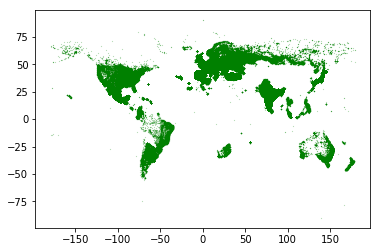

In [10]:
weltplot = plt.plot(geonames[0:,10].astype(float), geonames[0:,9].astype(float), 'g.')
plt.setp(weltplot, markersize=0.2)
plt.show()

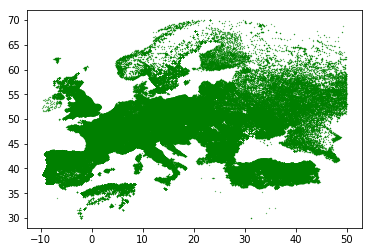

In [11]:
#Ausschnitt betrachten:
breitengrad = geonames[0:,9].astype(float)
laengengrad = geonames[0:,10].astype(float)
condition = [(breitengrad>30) & (breitengrad <70) & (laengengrad>-10) & (laengengrad <50)]
cond_a = np.extract(condition, breitengrad)
cond_b = np.extract(condition, laengengrad)
euplot = plt.plot(cond_b,cond_a, 'g.')
plt.setp(euplot, markersize=0.5)
plt.show()
###########################################################################################
###########################################################################################
###########################################################################################

In [12]:
#Fuzzy C-Means
niederschlag = kivaArray[:,26][0::1].astype(float) #Entsprechende Spalten auswählen, numerisieren und mit slicing neutralisieren
landnutzung = kivaArray[:,29][0::1].astype(float)
temperatur = kivaArray[:,31][0::1].astype(float)

fcm_kivaArray = np.vstack((temperatur,landnutzung,niederschlag)) #In Datenmatrix umwandeln für den Algorithmus

In [13]:
[cntr,u,_,_,_,_,_] = cmeans(fcm_kivaArray, c=30, m=2, error=0.001, maxiter=100)

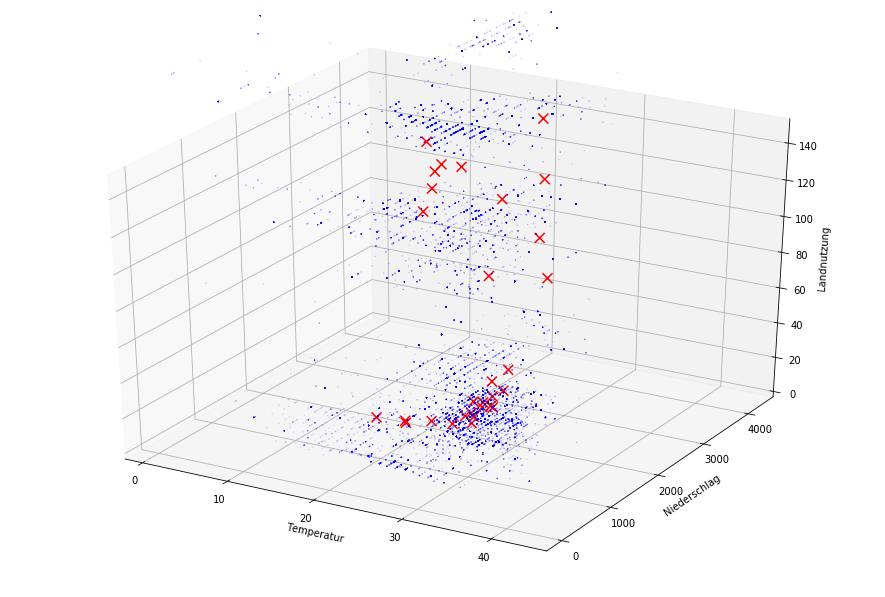

In [14]:
fig = plt.figure(figsize=(12,8)) 
ax = Axes3D(fig)

sequence_containing_y_vals = kivaArray[:,26][0::20].astype(float) 
sequence_containing_z_vals = kivaArray[:,29][0::20].astype(int) 
sequence_containing_x_vals = kivaArray[:,31][0::20].astype(int)

ax.scatter(cntr.T[0], cntr.T[2], cntr.T[1], alpha = 1, s=100,c='r', marker='x',zorder=10)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals,s=0.1,c='b',marker='.',zorder=-1)

ax.set_ylabel('Niederschlag')
ax.set_zlabel('Landnutzung')
ax.set_xlabel('Temperatur')

#ax.set_xlim(0,35)
#ax.set_ylim(20,40)
ax.set_zlim(0,150)

plt.show()

#Scheinbar zeigt FCM in diesem sehr unscharfen Fall erst bei hoher Clusteranzahl korrekte Gruppierungstendenzen an.

In [ ]:
#Local Outlier Factor? zurückgestellt

In [ ]:
#NSFCDT

In [15]:
class Triangle:
    def __init__(self):
        self.id = -1
        self.points = []
        self.visited = False
        self.neighbors = []

In [16]:
def convertTriangles(points,tri):
    convertedTriangles = []
    for i in range(0,len(tri.simplices)):
        newT = Triangle()
        newT.id = i
        newT.points = points[tri.simplices[i]] #Achtung: ein 2-Simplex ist ein Dreieck.
        newT.neighbors = finde_nachbardreiecke(i,tri)
        convertedTriangles.append(newT)
    return convertedTriangles

In [17]:
#Alle Nachbarn eines Dreiecks finden: (edit: Ist wohl zu langsam, besser direkt die neighbors-Funktion nutzen)
def finde_nachbardreiecke2(dindex,tri): #dindex ist der Dreiecksindex
    nachbarn = []
    for comb in itertools.combinations(tri.simplices[dindex], 2): #für alle Kanten
        for sid in range(0,len(tri.simplices)): #für alle Simplexindizes
            if((len(set(comb)-set(tri.simplices[sid])) == 0) 
                  & (not np.array_equal(tri.simplices[dindex],tri.simplices[sid]))): #Sind an dem Dreieck tri.simplices[sid] alle Kanten aus 'comb' beteiligt?
                nachbarn.append(sid)#Dann ist tri.simplices[sid] ein Nachbardreieck von tri.simplices[dindex]
    return nachbarn

In [18]:
#Alle Nachbarn eines Dreiecks finden:
def finde_nachbardreiecke(dindex,tri): 
    nachbarn = tri.neighbors[dindex][tri.neighbors[dindex]>0]
    return nachbarn

In [ ]:
#finde_nachbardreiecke(234,triangulation)

In [19]:
def satisfiable(t,lower,upper,angle): #Berechne Fläche des Dreiecks und überprüfe, ob es bzgl. der Grenzwerte die richtige Größe hat
    a = np.linalg.norm(t.points[0]-t.points[1])
    b = np.linalg.norm(t.points[0]-t.points[2])
    c = np.linalg.norm(t.points[1]-t.points[2])
    minAngle = -1
    if (a + b >= c) and (b + c >= a) and (c + a >= b):
        #print("it's a triangle")
        A = degrees(acos((b**2 + c**2 - a**2)/(2*b*c)))
        B = degrees(acos((c**2 + a**2 - b**2)/(2*c*a)))
        C = degrees(acos((a**2 + b**2 - c**2)/(2*a*b)))
        minAngle = np.min([A,B,C])
        #print("A: "+str(A)+", B: "+str(B)+", C: "+str(C)+", minAngle: "+str(minAngle))
    else:
        return False    
    s = (a + b + c) / 2
    area = (s*(s-a)*(s-b)*(s-c)) ** 0.5
    #print("a: "+str(a)+", b: "+str(b)+", c: "+str(c)+", s: "+str(s))
    if((area>=lower) & (area<=upper) & (minAngle > angle)):
        return True
    else:
        return False

In [20]:
def NSFCDT(points, lower_limit, upper_limit, min_angle): 
        #Punktemenge Array, min Größe Dreieck, max Größe Dreieck, minimaler Innenwinkel
    tri = Delaunay(points)
    #print(len(tri.simplices))
    DT = convertTriangles(points,tri)
    clusterSet = set()
    tmpSet = set()
    stack = []
    for dt in DT:
        if(dt.visited == False):
            newSet = set() 
            stack.append(dt)
            while(len(stack) > 0):
                t = stack.pop()
                if(satisfiable(t,lower_limit, upper_limit,min_angle) & (t.visited == False)):
                    #print("satisfied")
                    t.visited = True
                    newSet = newSet.union({t}) 
                    tmpSet = t.neighbors
                    for el in tmpSet: #Es wird über die Indizes der Nachbardreiecke von t iteriert
                        if(DT[el].visited == False): #Der DT-Index entspricht der ID des jeweiligen Dreiecks
                            stack.append(DT[el])
            clusterSet = clusterSet.union(newSet)
    return tri,clusterSet

In [21]:
#Für Unterscheidung der Cluster und verschiedene Einfärbung
def NSFCDT2(points, lower_limit, upper_limit, min_angle): 
        #Punktemenge Array, min Größe Dreieck, max Größe Dreieck, minimaler Innenwinkel
    tri = Delaunay(points)
    #print(len(tri.simplices))
    DT = convertTriangles(points,tri)
    clusterList = []
    tmpSet = set()
    stack = []
    for dt in DT:
        if(dt.visited == False):
            newList = list()
            stack.append(dt)
            while(len(stack) > 0):
                t = stack.pop()
                if(satisfiable(t,lower_limit, upper_limit,min_angle) & (t.visited == False)):
                    #print("satisfied")
                    t.visited = True
                    newList.append(t) 
                    tmpSet = t.neighbors
                    for el in tmpSet: #Es wird über die Indizes der Nachbardreiecke von t iteriert
                        if(DT[el].visited == False): #Der DT-Index entspricht der ID des jeweiligen Dreiecks
                            stack.append(DT[el])
            if (len(newList)>0):
                clusterList.append(newList)
    return tri,clusterList

In [23]:
def findColorPoints(I,limR,limG,limB): #Finde alle Punkte in angegebenem Farbraum 
    found = []
    for el in I:
        if ((el[2] in limR)
           & (el[3] in limG)
           & (el[4] in limB)):
            found.append([el[0],el[1]])
    return np.array(found)

In [ ]:
#Diese Variante ist deutlich langsamer, als das Array erst auf 5 Dimensionen Flach zu machen
#def findColorPoints2(I,limR,limG,limB): #Finde alle Punkte in angegebenem Farbraum 
#    found = []
#    for idx in np.ndindex(I0.shape[0:2]):
#            if ((I[idx][0] in limR) & (I[idx][1] in limG) & (I[idx][2] in limB)):
#                1#found.append(list(idx))
#    return np.array(found)

In [24]:
def reshapeImg(image):
    newI = []
    for a in range(0,image.shape[0]):
        for b in range(0,image.shape[1]):
            newI.append(np.concatenate([[a,b],image[a,b]]))
    return np.array(newI)

In [25]:
#Teste NSFCDT mit selbstgebasteltem Datensatz!
xe = np.concatenate(tuple([[x for x in range(0,4)] for y in range(0,4)]))
ye = np.concatenate(tuple([[y for x in range(0,4)] for y in range(0,4)]))
xe = np.concatenate((xe,[1.1,1.2,1.3,0.9,0.8,1.2,1.3,0.9],
                        [3.1,3.2,3.3,2.9,2.8,3.2,3.3,2.9,2.8],
                        [0,0.1,0.15,0.2,0.05,0.3,0.25,0.17,0.22,0.6,0.5]))
ye = np.concatenate((ye,[1,1.1,1.1,1.2,0.8,0.9,0.95,1],
                        [3,2.95,2.9,2.8,3.2,3.1,3.1,3,2.9],
                        [2.6,2.9,3,2.2,2.85,2.91,2.44,2.89,2.77,2.5,2.7]))
                     
testPoints = np.array([xe,ye]).T
[triangulation0,clusters0] = NSFCDT2(testPoints,0,0.05,10)
print(len(clusters0))
print(len(triangulation0.simplices))

3
75


In [26]:
def drawTriangle(t,axe):
    if(axe == 'x'):
        return np.append(t.points.T[0],t.points.T[0][0])
    else:
        return np.append(t.points.T[1],t.points.T[1][0])

In [27]:
def drawTriangle2(t,axe):
    if(axe == 'x'):
        return t.points.T[0]
    else:
        return t.points.T[1]

In [28]:
def getColor(i):
    colormap =  ['g','b','r','c','#C0FF20','#FFB720','#852FFF','y','m']
    return colormap[np.mod(i,9)]


In [29]:
def plotTriangles(triangulation,clusters,printImage,printDots,linewidth,fs):
    fig = plt.subplots(figsize=fs)
    xcord = triangulation.points.T[0]
    ycord = triangulation.points.T[1]
    if(printDots):
        plt.plot(xcord,ycord,'ko',zorder = 1)
    if(printImage==True):
        img = imageio.imread("mars1.jpg") #Hintergrundbild (z.B. zu clusterndes Satellitenbild)
        plt.imshow(img,zorder=0,extent=[0,I0.shape[1],I0.shape[0],0])
        for i in range(0,len(clusters)):
            simplices = np.array([triangulation.simplices[x.id] for x in clusters[i]])
            plt.triplot(ycord,xcord,simplices,linestyle ='-',color = getColor(i),lw=linewidth)
    else:
        for i in range(0,len(clusters)):
            simplices = np.array([triangulation.simplices[x.id] for x in clusters[i]])
            plt.triplot(xcord,ycord,simplices,linestyle ='-',color = getColor(i),lw=linewidth)
    plt.show()

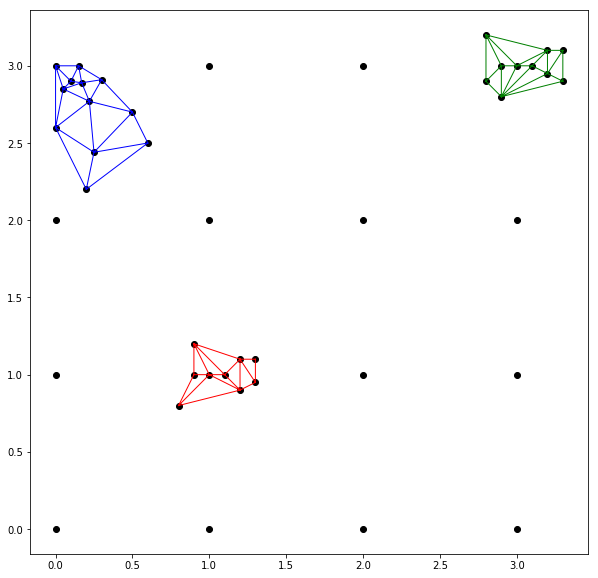

In [30]:
plotTriangles(triangulation0,clusters0,False,True,1,(10,10))

In [31]:
I0 = np.asarray(PIL.Image.open('mars2.jpg')) #Gesampeltes Bild, damit es nicht zu viele Dreiecke gibt!
I1 = reshapeImg(I0)
#foundInRange = findColorPoints(I1,range(37,45),range(33,38),range(47,49)) #Für ein Clustering ohne Clusterlängenfilterung
foundInRange = findColorPoints(I1,range(30,85),range(30,85),range(40,85))
print(foundInRange.shape)

(29840, 2)


In [32]:
[triangulation1,clusters1] = NSFCDT2(foundInRange,0,10,1) #Punkte, minimale Größe, maximale Größe, mindestgröße kleinster Innenwinkel
print(len(clusters1))
print(len(triangulation1.simplices))

56
59629


In [33]:
#Entferne alle zu kleinen Cluster:
clusters1 = np.extract(np.array([len(x)>100 for x in clusters1]),clusters1)

In [34]:
#Wieviele Dreiecke haben die Cluster jeweils?
for el in clusters1:
    print(len(el))

55467
111
137
909
1196


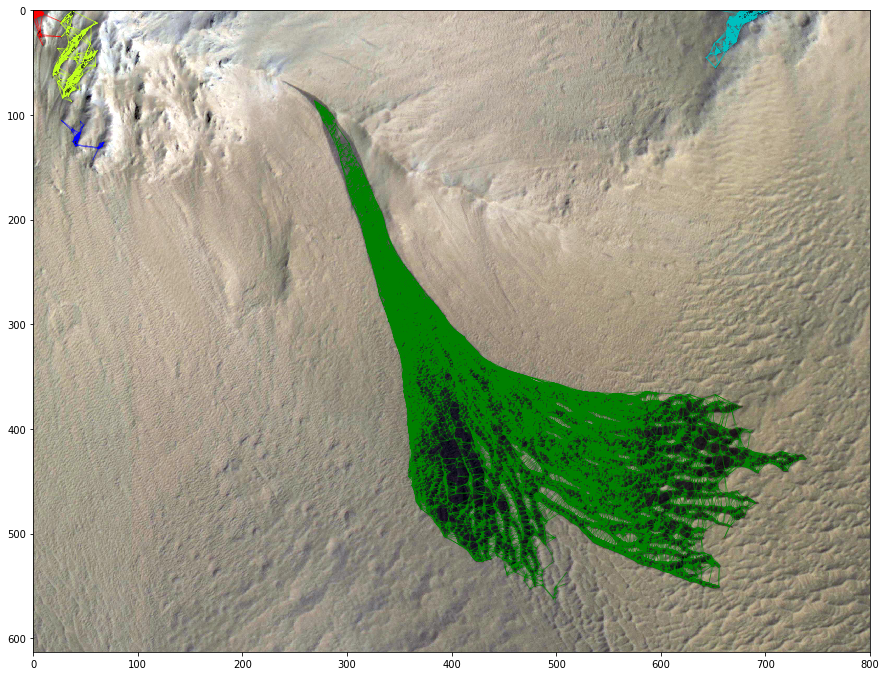

In [35]:
#EXTREM SCHWIERIG ZU CLUSTERNDES BILD!
plotTriangles(triangulation1,clusters1,True,False,0.3,(15,15))

In [ ]:
#CFGWC

In [ ]:
#cOpt mit Fuzzy Hypervolume

In [ ]:
#VAT?

In [ ]:
#Rand-Index

In [ ]:
#Partitionierungsstabilität